In [0]:
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from numpy import asarray
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM,Flatten, Dropout, SpatialDropout1D,Conv2D,MaxPooling2D,AveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras import optimizers
from keras.optimizers import Adam,Adadelta
from keras.models import load_model
from keras.preprocessing import sequence
from keras.losses import categorical_crossentropy
from sklearn.model_selection import train_test_split
import json, argparse, os
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import re
import io
import sys

data =pd.read_csv('gdrive/My Drive/fer2013.csv')
data.head()   
pixels = data['pixels'].tolist()
final_pixels_list=[]
for i in range(len(pixels)):
  pixels1=pixels[i].split()
  results = [int(j) for j in pixels1]
  array = np.array(pixels1)
  array=array.reshape(48,48,1)
  array = np.array(array, dtype=np.uint8)
  final_pixels_list.append(array)     
training_count=0
testing_count=0
validating_count=0
for i in range(len(pixels)):
        if data['Usage'][i]=="Training":
              training_count=training_count+1
        if data['Usage'][i]=="PublicTest":
              validating_count=validating_count+1
        else:
              testing_count=testing_count+1   

print(training_count)
print(testing_count)
print(validating_count)
print(data.tail())
test_output=data['emotion'].tolist()
for i in range(len(test_output)):
         test_output[i]=int(test_output[i])
encoded = to_categorical(test_output)
test_output=encoded
X_train=final_pixels_list[0:training_count]
X_validate=final_pixels_list[training_count:training_count+validating_count]
X_test=final_pixels_list[training_count+validating_count:len(final_pixels_list)]
y_train=test_output[0:training_count]
y_validate=test_output[training_count:training_count+validating_count]
y_test=test_output[training_count+validating_count:len(final_pixels_list)]
print(len(X_train))
print(len(X_validate))
print(len(X_test))
print((y_train.shape))
print(len(y_validate))
print(len(y_test))
num_classes=7


28709
32298
3589
       emotion                                             pixels        Usage
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest
28709
3589
3589
(28709, 7)
3589
3589


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 23, 23, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       147584    
__________

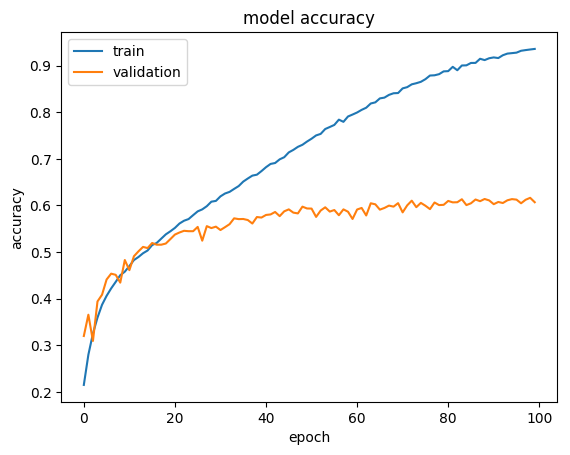

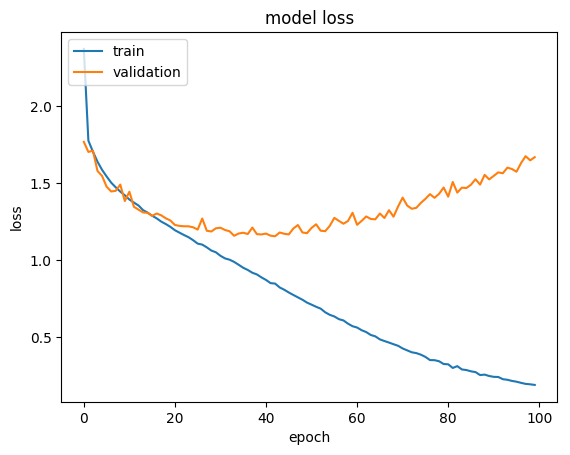

Saved model to disk


In [0]:
model = Sequential()
model.add(Conv2D(filters=64, input_shape=(48,48,1), kernel_size=(3,3),data_format = 'channels_last',activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))
model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu', padding='same'))
    #model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2), padding='same'))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
    #model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
    #model.add(BatchNormalization())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
    #model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(3,3),strides=(2,2), padding='same'))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.summary()
ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
model.compile(loss=categorical_crossentropy,optimizer=ada,metrics=['accuracy'])
batch_size=300
epochs=100 #changed from 30 to 70
history= model.fit(np.array(X_train), np.array(y_train), batch_size=batch_size,epochs=epochs,validation_data=(np.array(X_validate),np.array(y_validate)),verbose=1)
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size=batch_size)
print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))
    
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
model_json = model.to_json()
with open("model1.json", "w") as json_file:
     json_file.write(model_json)
    
model.save_weights("model1.h5")
print("Saved model to disk")

In [0]:
from keras.losses import categorical_crossentropy
from keras.models import model_from_json
from keras import backend as K

json_file = open('gdrive/Team Drives/ML project/Manasa/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("gdrive/Team Drives/ML project/Manasa/model.h5")
print("Loaded model from disk")

inp = loaded_model.input                                  # input placeholder
outputs = [layer.output for layer in loaded_model.layers] # all layer outputs
functor = K.function([inp]+ [K.learning_phase()], outputs ) # evaluation function

# Testing
test = np.array(X_test[0].reshape((1,48,48,1)))
layer_outs = functor([test, 1.])
print(layer_outs[13])

print(y_test[0])
ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
loaded_model.compile(loss=categorical_crossentropy, optimizer=ada, metrics=['accuracy'])
score = loaded_model.evaluate(X_test[0].reshape((1,48, 48,1)), np.array(y_test[0]).reshape(1,7), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))


Loaded model from disk
[[5.1374227e-01 3.1154035e-02 1.1233729e-01 2.1383308e-05 2.1932585e-02
  7.1203033e-04 3.2010043e-01]]
[1. 0. 0. 0. 0. 0. 0.]
acc: 100.00%


In [0]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

ada = Adadelta(lr=0.1, rho=0.95, epsilon=1e-08)
loaded_model.compile(loss=categorical_crossentropy, optimizer=ada, metrics=['accuracy'])
score = loaded_model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

y_pred=loaded_model.predict(np.array(X_test))
print(precision_recall_fscore_support(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1), average='micro'))
print(accuracy_score(np.array(y_test).argmax(axis=1), np.array(y_pred).argmax(axis=1), normalize=True))

acc: 59.24%
(0.5923655614377263, 0.5923655614377263, 0.5923655614377263, None)
0.5923655614377263


[[6.8558848e-01 1.7912575e-03 2.4762946e-01 1.4011633e-06 1.0930170e-02
  9.0343616e-04 5.3155877e-02]]
[1. 0. 0. 0. 0. 0. 0.]
0
yes


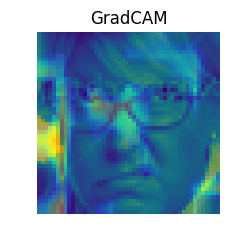

In [0]:
import cv2

from matplotlib import pyplot as plt

from keras.losses import categorical_crossentropy
from keras.models import model_from_json
from keras import backend as K
number=0
for number in range(1):
    predictions = loaded_model.predict(np.array(X_test[number]).reshape(1,48,48,1))
    print(predictions)
    print(y_test[number])
    cls=np.argmax(predictions)
    print(cls)
    if np.argmax(y_test[number])==cls:
        print("yes")
    else:
        print("No")
    y_c = loaded_model.output[0, cls]
    #print(y_c)
    #print(loaded_model.layers[6])
    conv_output = loaded_model.layers[6].output
    grads = K.gradients(y_c, conv_output)[0]
    #print(grads)
    gradient_function = K.function([loaded_model.input], [conv_output, grads])

    output, grads_val = gradient_function([np.array(X_test[number]).reshape(1,48,48,1)])
    output, grads_val = output[0, :], grads_val[0, :, :, :]
    weights = np.mean(grads_val, axis=(0, 1))
    cam = np.dot(output, weights)
    cam = cv2.resize(cam, (48, 48), cv2.INTER_LINEAR)
    cam = np.maximum(cam, 0)
    cam = cam / cam.max()


    plt.figure(figsize=(8, 8))
    plt.subplot(131)
    plt.title('GradCAM')
    plt.axis('off')
    #plt.imshow(load_image(img_path, preprocess=False))
    plt.imshow(X_test[number].reshape(48,48))
    plt.imshow(cam, cmap='jet', alpha=0.3)
    plt.show()

0
[[6.8558848e-01 1.7912575e-03 2.4762946e-01 1.4011633e-06 1.0930170e-02
  9.0343616e-04 5.3155877e-02]]
[1. 0. 0. 0. 0. 0. 0.]
0
yes


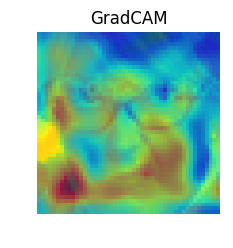

In [0]:
from scipy.ndimage.interpolation import zoom
number=0

for number in range(1):
      print(number)
      predictions = loaded_model.predict(np.array(X_test[number]).reshape(1,48,48,1))
      print(predictions)
      print(y_test[number])
      cls = np.argmax(loaded_model.predict(np.array(X_test[number]).reshape(1,48,48,1)))
      print(cls)
      if np.argmax(y_test[number])==cls:
        print("yes")
      else:
        print("No")
      y_c = loaded_model.output[0, cls]
      conv_output = loaded_model.layers[6].output

      grads = K.gradients(y_c, conv_output)[0]

      first = K.exp(y_c)*grads
      second = K.exp(y_c)*grads*grads
      third = K.exp(y_c)*grads*grads

      gradient_function = K.function([loaded_model.input], [y_c,first,second,third, conv_output, grads])
      y_c, conv_first_grad, conv_second_grad,conv_third_grad, conv_output, grads_val = gradient_function([np.array(X_test[number]).reshape(1,48,48,1)])
      global_sum = np.sum(conv_output[0].reshape((-1,conv_first_grad[0].shape[2])), axis=0)

      alpha_num = conv_second_grad[0]
      alpha_denom = conv_second_grad[0]*2.0 + conv_third_grad[0]*global_sum.reshape((1,1,conv_first_grad[0].shape[2]))
      alpha_denom = np.where(alpha_denom != 0.0, alpha_denom, np.ones(alpha_denom.shape))
      alphas = alpha_num/alpha_denom

      weights = np.maximum(conv_first_grad[0], 0.0)

      alpha_normalization_constant = np.sum(np.sum(alphas, axis=0),axis=0)

      alphas /= alpha_normalization_constant.reshape((1,1,conv_first_grad[0].shape[2]))

      deep_linearization_weights = np.sum((weights*alphas).reshape((-1,conv_first_grad[0].shape[2])),axis=0)
      grad_CAM_map = np.sum(deep_linearization_weights*conv_output[0], axis=2)

          # Passing through ReLU
      cam = np.maximum(grad_CAM_map, 0)
      cam = zoom(cam,48/cam.shape[0])
      cam = cam / np.max(cam) # scale 0 to 1.0   
      plt.figure(figsize=(8, 8))
      plt.subplot(131)
      plt.title('GradCAM')
      plt.axis('off')
      #plt.imshow(load_image(img_path, preprocess=False))
      plt.imshow(X_test[number].reshape(48,48))
      plt.imshow(cam, cmap='jet', alpha=0.5)
      plt.show()

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
